In [214]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import scipy.sparse
import networkx as nx
import seaborn as sns

%matplotlib inline
sns.set(style='white', rc={'figure.figsize':(12,10)})

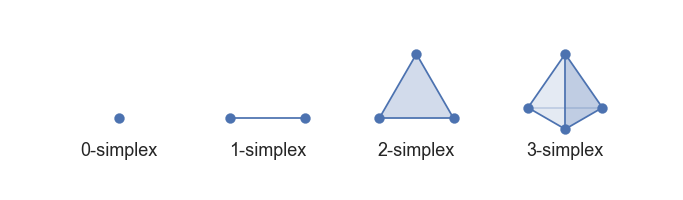

In [278]:
fig = plt.figure()
ax = fig.add_subplot(111)

# 0-simplex
#ax.add_patch(plt.Circle([0.25,0], .05))

# 1-simplex
#ax.add_patch(plt.Circle([1, 0], .05))
#ax.add_patch(plt.Circle([1.5, 0], .05))
ax.add_line(plt.Line2D([1, 1.5], [0, 0]))

# 2-simplex
t1 = np.sqrt(0.5**2 - 0.25**2)
#ax.add_patch(plt.Circle([2, 0], .05))
#ax.add_patch(plt.Circle([2.5, 0], .05))
#ax.add_patch(plt.Circle([2.25, t1], .05))
ax.add_line(plt.Line2D([2, 2.5], [0, 0]))
ax.add_line(plt.Line2D([2, 2.25], [0, t]))
ax.add_line(plt.Line2D([2.25, 2.5], [t1, 0]))
ax.add_patch(plt.Polygon([[2, 0],[2.5, 0],[2.25, t1]], True, alpha=0.25))

# 3-simplex
t2 = np.sqrt(0.5**2 - 0.25**2)
u = -t2 / 3.0
a = -u / 2.0
#ax.add_patch(plt.Circle([3, a], .05))
#ax.add_patch(plt.Circle([3.5, a], .05))
#ax.add_patch(plt.Circle([3.25, t2], .05))
#ax.add_patch(plt.Circle([3.25, u+a], .05))
ax.add_line(plt.Line2D([3, 3.5], [a, a], alpha=0.25))
ax.add_line(plt.Line2D([3, 3.25], [a, t2]))
ax.add_line(plt.Line2D([3.25, 3.5], [t2, a]))
ax.add_line(plt.Line2D([3.25, 3.25], [t, u+a]))
ax.add_line(plt.Line2D([3, 3.25], [a, u+a]))
ax.add_line(plt.Line2D([3.5, 3.25], [a, u+a]))
ax.add_patch(plt.Polygon([[3, a],[3.25, t2],[3.25, u+a]], True, alpha=0.15))
ax.add_patch(plt.Polygon([[3.5, a],[3.25, t2],[3.25, u+a]], True, alpha=0.35))

plt.scatter([0.25, 1, 1.5, 2, 2.25, 2.5, 3, 3.25, 3.25, 3.5],
            [0.00, 0, 0.0, 0, t1  , 0.0, a, t2  , u+a , a], s=100)

plt.text(0.25, -0.25, "0-simplex", fontsize=18, horizontalalignment='center')
plt.text(1.25, -0.25, "1-simplex", fontsize=18, horizontalalignment='center')
plt.text(2.25, -0.25, "2-simplex", fontsize=18, horizontalalignment='center')
plt.text(3.25, -0.25, "3-simplex", fontsize=18, horizontalalignment='center')

ax.axis([-0.5, 4, -0.5, 0.75])
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
plt.savefig('simplices.png', bbox_inches='tight', pad_inches=0.1)

In [239]:
np.sqrt(0.5**2 - 0.25**2)

0.4330127018922193

In [110]:
size=50
np.random.seed(42)
xs = np.concatenate([np.random.normal(loc=-np.pi, scale=np.pi/2.0, size=size), 
                     np.random.normal(loc=np.pi, scale=np.pi/2.0, size=size)])
ys = (np.sin(xs) + np.random.normal(scale=0.05, size=size*2)) * np.pi

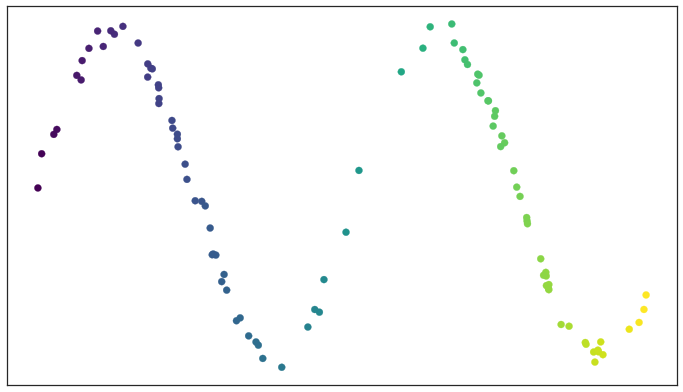

In [173]:
plt.scatter(xs, ys, c=xs, cmap='viridis')
plt.gca().set_aspect('equal')
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.savefig('how_umap_works_raw_data.png', bbox_inches='tight', pad_inches=0.1)

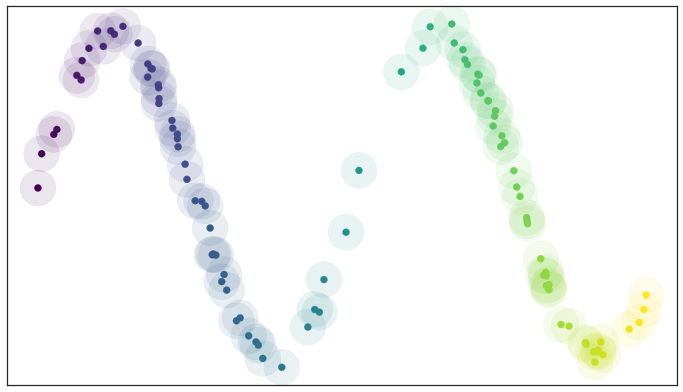

In [172]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xs, ys, c=xs, cmap='viridis')
color_mapper = plt.cm.ScalarMappable(cmap='viridis')
color_mapper.set_clim(xs.min(), xs.max())
radii = 0.35 * np.ones(xs.shape[0])
data = np.vstack([xs, ys]).T
for idx, point in enumerate(data):
    ax.add_artist(plt.Circle((point[0], point[1]), radii[idx], 
                             color=color_mapper.to_rgba(xs[idx]), 
                             alpha=0.1, zorder=0))
ax.set_aspect('equal')
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.savefig('how_umap_works_open_cover.png', bbox_inches='tight', pad_inches=0.1)

In [180]:
from sklearn.neighbors import KDTree
from sklearn.metrics import pairwise_distances

In [188]:
data = np.vstack([xs, ys]).T
tree = KDTree(data)

In [213]:
neighbors = tree.query_radius(data, 0.7)
mat_rows = np.array([list(x) for x in neighbors])
mat_data = np.array([np.ones(len(x)).tolist() for x in neighbors])
basic_graph = scipy.sparse.lil_matrix((data.shape[0], data.shape[0]), dtype=int)
basic_graph.rows = mat_rows
basic_graph.data = mat_data
basic_graph = basic_graph.tocsr()
nx_basic_graph = nx.Graph(basic_graph)
nx_basic_graph.remove_edges_from(nx_basic_graph.selfloop_edges())
triangles = nx.cycles.cycle_basis(nx_basic_graph)

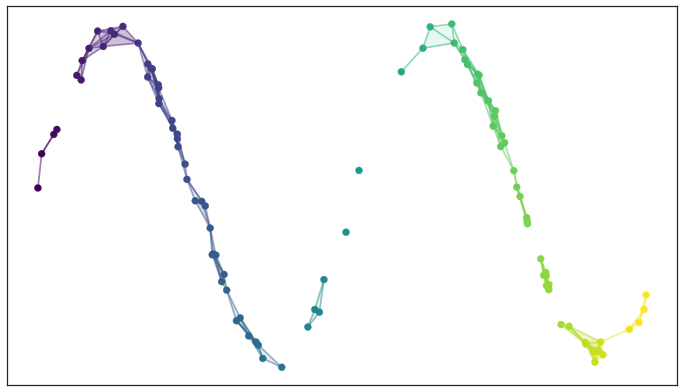

In [228]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xs, ys, c=xs, cmap='viridis')
color_mapper = plt.cm.ScalarMappable(cmap='viridis')
color_mapper.set_clim(xs.min(), xs.max())
for i in range(xs.shape[0]):
    for j in range(i, ys.shape[0]):
        if basic_graph[i, j] > 0.0:
            ax.add_line(plt.Line2D([xs[i], xs[j]], 
                                   [ys[i], ys[j]],
                                   color=color_mapper.to_rgba(xs[i]),
                                   alpha=0.5))
triangle_patches = []
for triangle in triangles:
    triangle_patches.append(plt.Polygon(data[triangle], True))
triangle_collection = PatchCollection(triangle_patches, alpha=0.1, cmap='viridis')
triangle_collection.set_array(np.array([xs[a[0]] for a in triangles]))
ax.add_collection(triangle_collection)

ax.set_aspect('equal')
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.savefig('how_umap_works_basic_graph.png', bbox_inches='tight', pad_inches=0.1)

In [181]:
knn_dist, knn_indices = tree.query(data, k=5)
radii = knn_dist[:, -1]

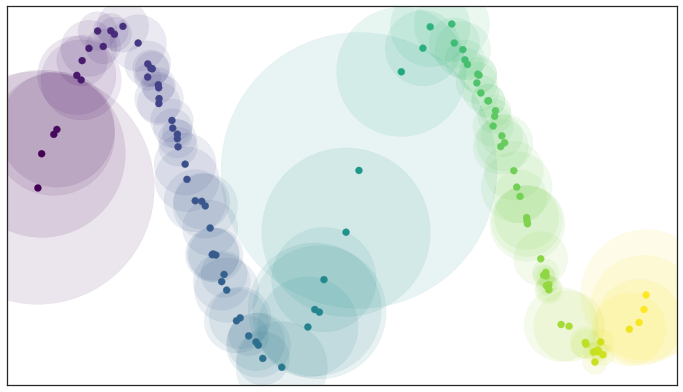

In [182]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xs, ys, c=xs, cmap='viridis')
color_mapper = plt.cm.ScalarMappable(cmap='viridis')
color_mapper.set_clim(xs.min(), xs.max())
for idx, point in enumerate(data):
    ax.add_artist(plt.Circle((point[0], point[1]), radii[idx], 
                             color=color_mapper.to_rgba(xs[idx]), 
                             alpha=0.1, zorder=0))
ax.set_aspect('equal')
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.savefig('how_umap_works_local_metric_open_cover.png', bbox_inches='tight', pad_inches=0.1)

In [116]:
import umap

In [117]:
sigma, rho = umap.umap_.smooth_knn_dist(knn_dist, 5)

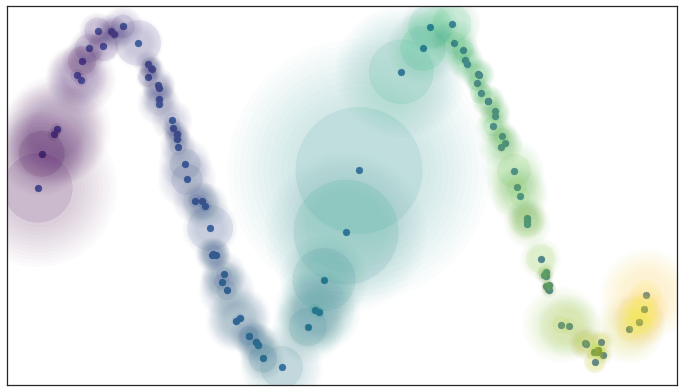

In [175]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xs, ys)
color_mapper = plt.cm.ScalarMappable(cmap='viridis')
color_mapper.set_clim(xs.min(), xs.max())
for idx, point in enumerate(data):
    for t in np.linspace(0.5, 1.0, 12):
        ax.add_artist(plt.Circle((point[0], point[1]), 
                                 (sigma[idx] + rho[idx]) * t,
                                 color=color_mapper.to_rgba(xs[idx]),
                                 alpha=0.015))
    ax.add_artist(plt.Circle((point[0], point[1]),
                             rho[idx],
                             color=color_mapper.to_rgba(xs[idx]),
                             alpha=0.1))
ax.set_aspect('equal')
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.savefig('how_umap_works_umap_open_cover.png', bbox_inches='tight', pad_inches=0.1)

In [119]:
dmat = pairwise_distances(data)
pre_graph = umap.umap_.fuzzy_simplicial_set(dmat, 5, np.random, 
                                            'precomputed', raw_result=True)
pre_graph = pre_graph.tocsr()

In [120]:
from matplotlib.path import Path
import matplotlib.patches as patches

def curve(xs, ys, sign, color, alpha):
    if sign == 0:
        control = (np.mean(xs) + 0.33 * (ys[1] - ys[0]) , np.mean(ys) + 0.33 * (xs[0] - xs[1]))
    else:
        control =  (np.mean(xs) + 0.33 * (ys[1] - ys[0]) , np.mean(ys) + 0.33 * (xs[1] - xs[0]))
    path = Path([(xs[0], ys[0]), control, (xs[1], ys[1])], 
                [Path.MOVETO, Path.CURVE3, Path.CURVE3])
    patch = patches.PathPatch(path, facecolor='none', edgecolor=color, alpha=0.8*alpha, linewidth=1.5)
    return patch

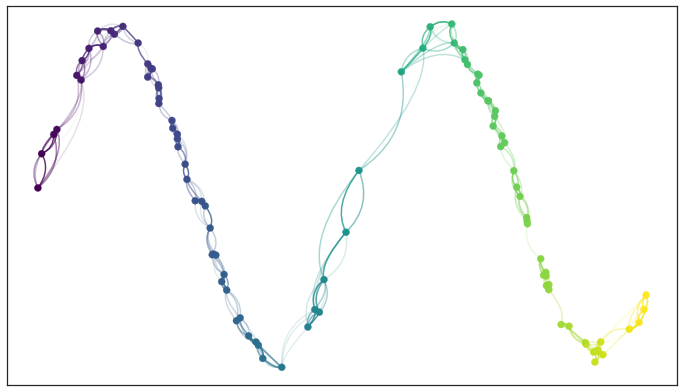

In [176]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xs, ys, c=xs, cmap='viridis')
color_mapper = plt.cm.ScalarMappable(cmap='viridis')
color_mapper.set_clim(xs.min(), xs.max())
for i in range(xs.shape[0]):
    for j in range(ys.shape[0]):
        if pre_graph[i, j] > 0.0:
            ax.add_patch(curve([xs[i], xs[j]], 
                                   [ys[i], ys[j]],
                                   i > j,
                                   color=color_mapper.to_rgba(xs[i]),
                                   alpha=pre_graph[i, j]))
ax.set_aspect('equal')
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.savefig('how_umap_works_raw_graph.png', bbox_inches='tight', pad_inches=0.1)

In [122]:
pre_graph[0,[2,27,40]].todense(), pre_graph[[2,27,40],0].todense()

(matrix([[0.57057636, 0.35209733, 0.39924558]]), matrix([[0.34120097],
         [0.29208991],
         [0.        ]]))

In [123]:
dmat = pairwise_distances(data)
graph = umap.umap_.fuzzy_simplicial_set(dmat, 5, np.random, 'precomputed')

In [124]:
import matplotlib.lines

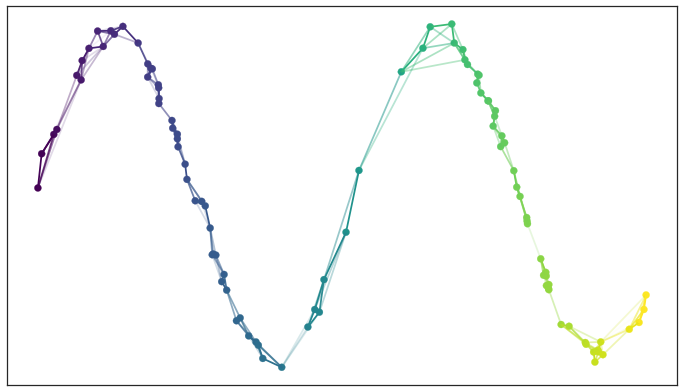

In [177]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xs, ys, c=xs, cmap='viridis')
color_mapper = plt.cm.ScalarMappable(cmap='viridis')
color_mapper.set_clim(xs.min(), xs.max())
for i in range(xs.shape[0]):
    for j in range(i, ys.shape[0]):
        if graph[i, j] > 0.0:
            ax.add_line(plt.Line2D([xs[i], xs[j]], 
                                   [ys[i], ys[j]],
                                   color=color_mapper.to_rgba(xs[i]),
                                   alpha=graph[i, j]))
ax.set_aspect('equal')
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.savefig('how_umap_works_umap_graph.png', bbox_inches='tight', pad_inches=0.1)

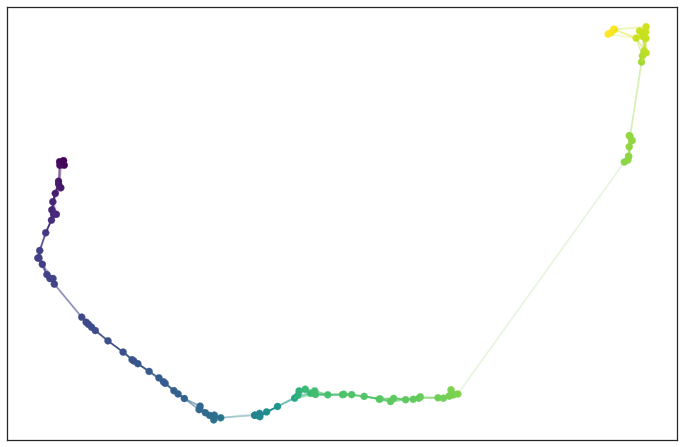

In [178]:
u = umap.UMAP(n_neighbors=5, random_state=42, negative_sample_rate=1, min_dist=0.3).fit_transform(data)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(*u.T, c=xs, cmap='viridis')
color_mapper = plt.cm.ScalarMappable(cmap='viridis')
color_mapper.set_clim(xs.min(), xs.max())
for i in range(u.shape[0]):
    for j in range(i, u.shape[0]):
        if graph[i, j] > 0.0:
            ax.add_line(plt.Line2D([u[i,0], u[j,0]], 
                                   [u[i,1], u[j,1]],
                                   color=color_mapper.to_rgba(xs[i]),
                                   alpha=graph[i, j]))
ax.set_aspect('equal')
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.savefig('how_umap_works_umap_graph_layout.png', bbox_inches='tight', pad_inches=0.1)

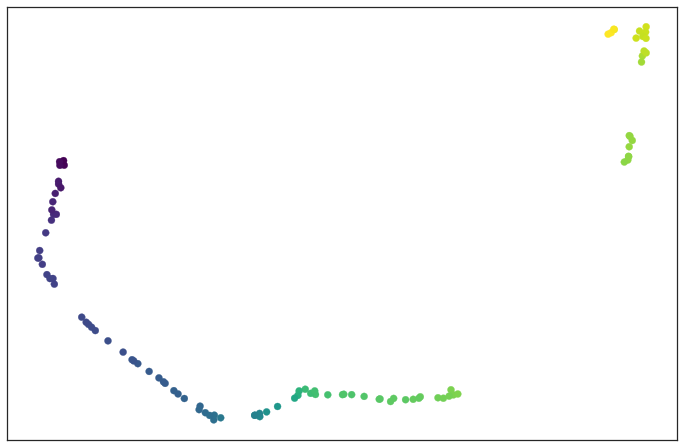

In [179]:
u = umap.UMAP(n_neighbors=5, random_state=42, negative_sample_rate=1, min_dist=0.3).fit_transform(data)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(*u.T, c=xs, cmap='viridis')
ax.set_aspect('equal')
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.savefig('how_umap_works_umap_layout.png', bbox_inches='tight', pad_inches=0.1)